In [612]:
#import working libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
% matplotlib inline
import statsmodels.api as sm

from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [613]:
#set working directory
os.chdir(r"C:\Users\himanshu gupta\Desktop\edwisor\project\2")

In [614]:
#load data
bike_rental_data= pd.read_csv("day.csv")

### data exploration

In [615]:
#dimension of data
bike_rental_data.shape

(731, 16)

In [616]:
#checking first 5 rows
bike_rental_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [617]:
#checking data type of all variables
bike_rental_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [618]:
# checking summary of the dataset
bike_rental_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [619]:
#converting some useful variables into categorical variabels
categorical_var= ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for a in categorical_var:
    bike_rental_data[a]=bike_rental_data[a].astype("category")

In [620]:
#checking datatypes again
bike_rental_data.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

we will not use instant,dateday, casual and registered variable because they are not caryying useful information.

### data preprocessing

##### target variable distribution

C:\Users\himanshu gupta\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


((array([-3.10612952, -2.83371839, -2.68121219, -2.57340905, -2.48915191,
         -2.41955673, -2.36001798, -2.30782877, -2.26125818, -2.21912992,
         -2.18060696, -2.14507173, -2.11205508, -2.08119197, -2.05219258,
         -2.0248228 , -1.99889075, -1.97423711, -1.95072808, -1.92825019,
         -1.90670633, -1.88601273, -1.8660966 , -1.84689427, -1.82834975,
         -1.81041348, -1.79304141, -1.77619419, -1.75983653, -1.74393663,
         -1.72846577, -1.71339788, -1.69870925, -1.68437825, -1.67038506,
         -1.6567115 , -1.64334086, -1.63025771, -1.6174478 , -1.60489794,
         -1.59259587, -1.58053022, -1.56869036, -1.55706641, -1.54564912,
         -1.53442983, -1.52340042, -1.51255328, -1.50188124, -1.49137757,
         -1.4810359 , -1.47085025, -1.46081495, -1.45092464, -1.44117426,
         -1.431559  , -1.4220743 , -1.41271583, -1.40347947, -1.39436132,
         -1.38535765, -1.3764649 , -1.36767969, -1.35899879, -1.35041911,
         -1.3419377 , -1.33355173, -1.

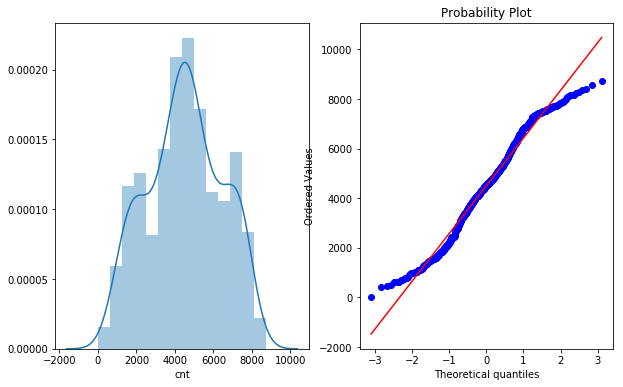

In [621]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
sn.distplot(bike_rental_data["cnt"],ax=ax1)
stats.probplot(bike_rental_data["cnt"], dist='norm', fit=True, plot=ax2)

we can cleary see that cnt is very close to normal distribution.

##### missing value analysis

In [622]:
bike_rental_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

there are no missing values.

##### outliner analysis

from above boxplot following things are clear:

[Text(0,0.5,'cnt'),
 Text(0.5,0,'workingday'),
 Text(0.5,1,'Boxplot for cnt vs workingday')]

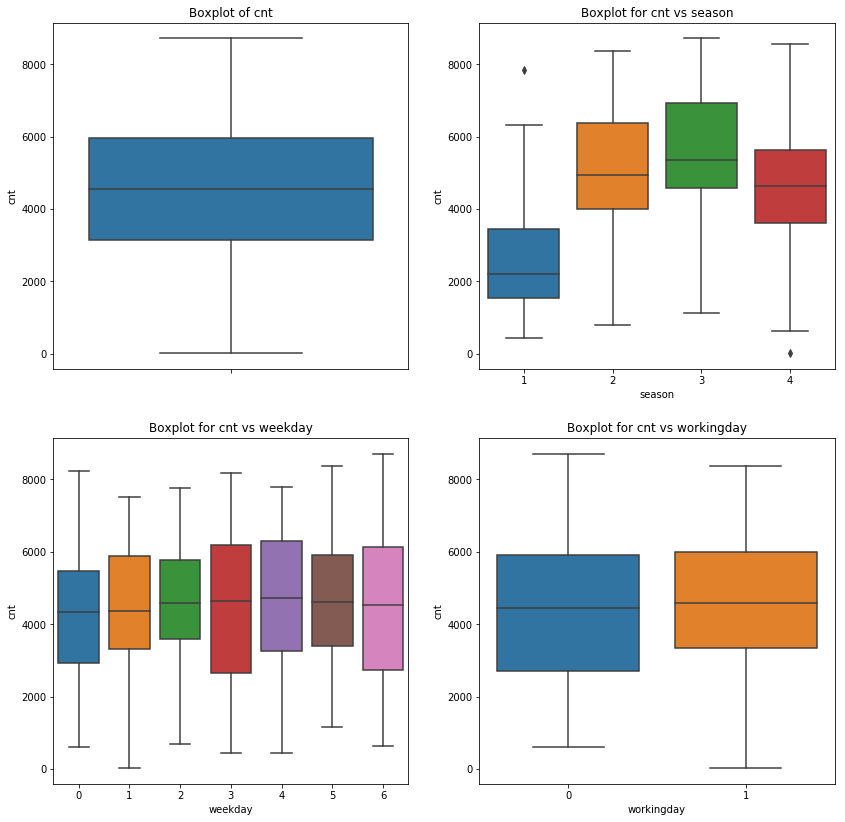

In [623]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(14,14)
sn.boxplot(data=bike_rental_data,y="cnt",orient='v',ax=axes[0][0])
sn.boxplot(data=bike_rental_data,y="cnt",x="season",orient='v',ax=axes[0][1])
sn.boxplot(data=bike_rental_data,y="cnt",x="weekday",orient="v",ax=axes[1][0])
sn.boxplot(data=bike_rental_data,y="cnt",x="workingday",orient="v",ax=axes[1][1])
axes[0][0].set(ylabel='cnt',title = "Boxplot of cnt")
axes[0][1].set(xlabel="season",ylabel="cnt",title="Boxplot for cnt vs season")
axes[1][0].set(xlabel="weekday", ylabel="cnt",title="Boxplot for cnt vs weekday")
axes[1][1].set(xlabel="workingday",ylabel="cnt",title="Boxplot for cnt vs workingday")

(1)there are no outliers in count.
(2)demands for bike is very low in spring season.

from above boxplot following things are clear:
(1)there are no outliers in count.
(2)demands for bike is very low in spring season.

[Text(0,0.5,'cnt'),
 Text(0.5,0,'weathersit'),
 Text(0.5,1,'Boxplot for cnt vs weathersit')]

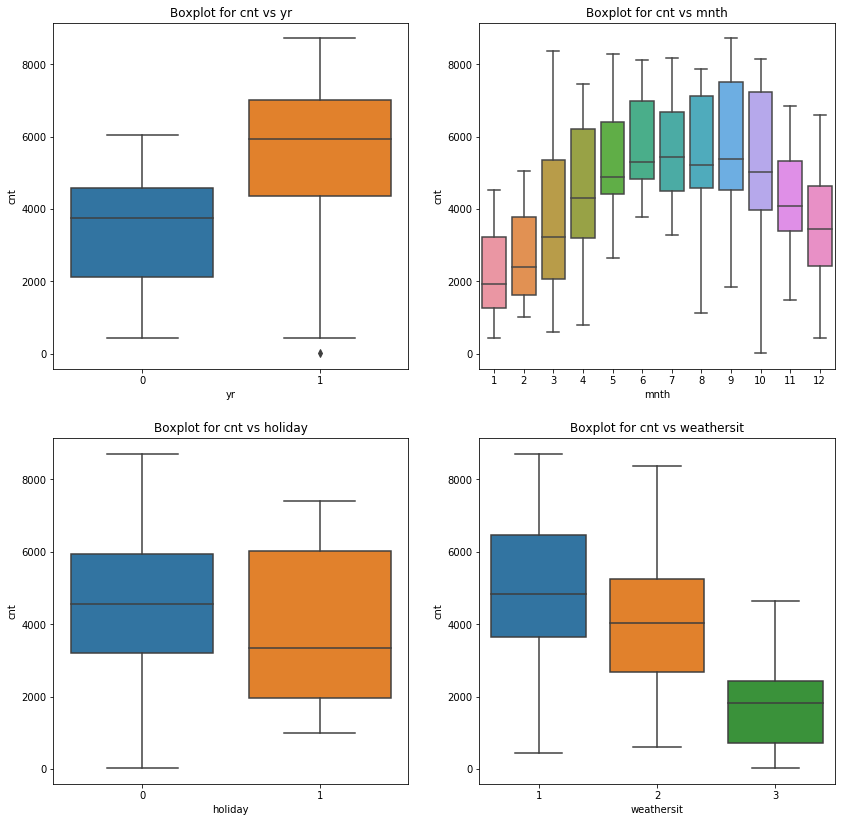

In [624]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(14,14)
sn.boxplot(data=bike_rental_data,y="cnt",x="yr",orient='v',ax=axes[0][0])
sn.boxplot(data=bike_rental_data,y="cnt",x="mnth",orient='v',ax=axes[0][1])
sn.boxplot(data=bike_rental_data,y="cnt",x="holiday",orient='v',ax=axes[1][0])
sn.boxplot(data=bike_rental_data,y="cnt",x="weathersit",orient='v',ax=axes[1][1])
axes[0][0].set(xlabel="yr",ylabel="cnt",title="Boxplot for cnt vs yr")
axes[0][1].set(xlabel="mnth",ylabel="cnt",title="Boxplot for cnt vs mnth")
axes[1][0].set(xlabel="holiday",ylabel="cnt",title="Boxplot for cnt vs holiday")
axes[1][1].set(xlabel="weathersit",ylabel="cnt",title="Boxplot for cnt vs weathersit")

from above boxplot following things are clear:

(1) demands for bike is high in year 2011.
(2) demands for bike is gardually incaresing from january to september and then started to decreasing.
(3) demands for bike is high when there is clear weather.

[Text(0,0.5,'windspeed'), Text(0.5,1,'Boxplot for windspeed')]

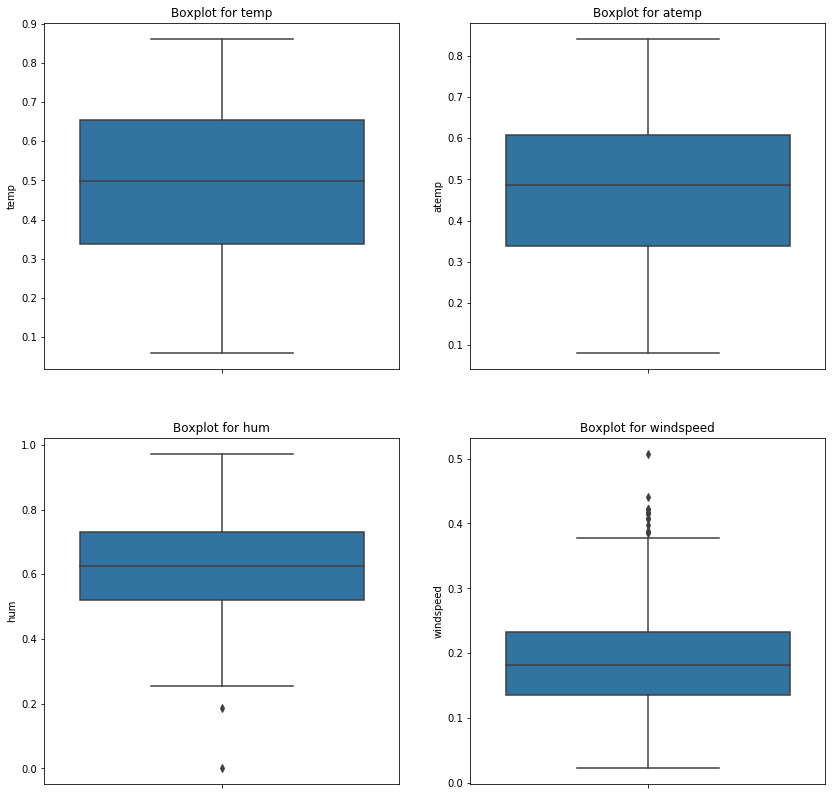

In [625]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(14,14)
sn.boxplot(data=bike_rental_data,y="temp",orient='v',ax=axes[0][0])
sn.boxplot(data=bike_rental_data,y="atemp",orient='v',ax=axes[0][1])
sn.boxplot(data=bike_rental_data,y="hum",orient='v',ax=axes[1][0])
sn.boxplot(data=bike_rental_data,y="windspeed",orient='v',ax=axes[1][1])
axes[0][0].set(ylabel="temp",title="Boxplot for temp")
axes[0][1].set(ylabel="atemp",title="Boxplot for atemp")
axes[1][0].set(ylabel="hum",title="Boxplot for hum")
axes[1][1].set(ylabel="windspeed",title="Boxplot for windspeed")

From the above boxplot we can cleary see that there are:
(1) outliers in windspeed.
(2) inliers in humidity.

In [626]:
#removal of outliers and inliers
cnames=["hum","windspeed"]
for i in cnames:
    print(i)
    q75, q25 = np.percentile(bike_rental_data.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    bike_rental_data = bike_rental_data.drop(bike_rental_data[bike_rental_data.loc[:,i] < min].index)
    bike_rental_data = bike_rental_data.drop(bike_rental_data[bike_rental_data.loc[:,i] > max].index)
    min = bike_rental_data.loc[bike_rental_data[i] < min,i] 
    max = bike_rental_data.loc[bike_rental_data[i] > max,i]

hum
0.20468725
1.04552125
windspeed
-0.012431
0.380585


subsituted inliers with minimum values and outliers with maximum values.

Text(0.5,1,'Boxplot of humidity')

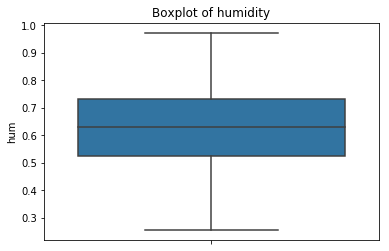

In [627]:
#checking humidity and windspeed after removal of inliers and outliers
fig.set_size_inches(14,14)
sn.boxplot(data=bike_rental_data,y="hum").set_title("Boxplot of humidity")

Text(0.5,1,'Boxplot of windspeed')

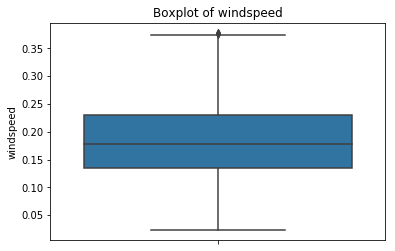

In [628]:
fig.set_size_inches(14,14)
sn.boxplot(data=bike_rental_data,y="windspeed").set_title("Boxplot of windspeed")

##### feature selection

In [629]:
##Correlation analysis
#numeric variables
cnames=["temp","atemp","hum","windspeed","cnt"]
#Correlation plot
bike_rental_corr = bike_rental_data.loc[:,cnames]

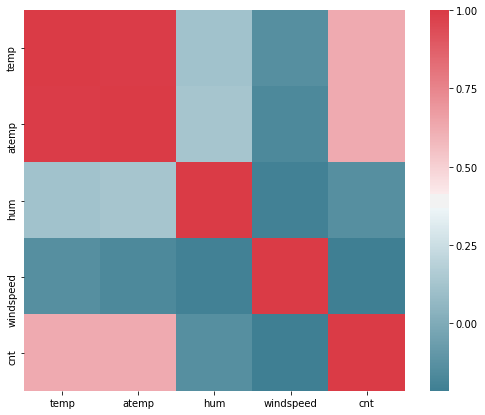

In [630]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(9, 7))

#Generate correlation matrix
corr = bike_rental_corr.corr()

#Plot using seaborn library
sn.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sn.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

from the above plot,we came to know that both temp and atemp variables are carrying almost same information
hence there is no need to continue with both variables.so we need to drop any one of the variables
here we are dropping atemp variable.

In [631]:
#Anova test for categorical variables(target variable is numeric)
#Save categorical variables
cat_names = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

In [632]:
for i in cat_names:
    results = ols('cnt' + '~' + i, data = bike_rental_data).fit()
    aov_table = sm.stats.anova_lm(results, typ = 2)
    print(aov_table)

                sum_sq     df           F        PR(>F)
season    9.218466e+08    3.0  124.840203  5.433284e-65
Residual  1.754981e+09  713.0         NaN           NaN
                sum_sq     df           F        PR(>F)
yr        8.813271e+08    1.0  350.959951  5.148657e-64
Residual  1.795501e+09  715.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      1.042307e+09   11.0  40.869727  2.557743e-68
Residual  1.634521e+09  705.0        NaN           NaN
                sum_sq     df        F    PR(>F)
holiday   1.377098e+07    1.0  3.69735  0.054896
Residual  2.663057e+09  715.0      NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.757122e+07    6.0  0.781896  0.584261
Residual  2.659257e+09  710.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  8.494340e+06    1.0  2.276122  0.131822
Residual    2.668333e+09  715.0       NaN       NaN
                  sum_sq     df          F    

based on the anova result, we are going to drop three variables holiday,weekday,workingday
because these variables have the p-value > 0.05

In [633]:
# Removing the variables which have p-value > 0.05 and are correlated variable or does not contain useful information and store into a new dataset
df = bike_rental_data.drop(['atemp', 'holiday','weekday','workingday','instant','dteday','casual','registered'], axis=1)
bike_rental_data=df.copy()

In [634]:
#now check dimension of data
bike_rental_data.shape

(717, 8)

In [635]:
bike_rental_data

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
0,1,0,1,2,0.344167,0.805833,0.160446,985
1,1,0,1,2,0.363478,0.696087,0.248539,801
2,1,0,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,1,0.226957,0.436957,0.186900,1600
5,1,0,1,1,0.204348,0.518261,0.089565,1606
6,1,0,1,2,0.196522,0.498696,0.168726,1510
7,1,0,1,2,0.165000,0.535833,0.266804,959
8,1,0,1,1,0.138333,0.434167,0.361950,822
9,1,0,1,1,0.150833,0.482917,0.223267,1321


##### feature scaling

In [636]:
col=["temp","hum","windspeed","cnt"]

temp


C:\Users\himanshu gupta\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


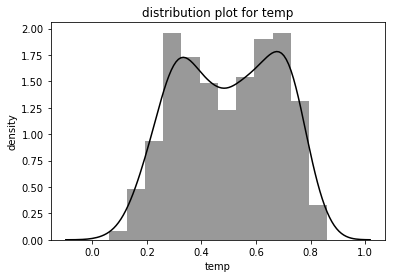

hum


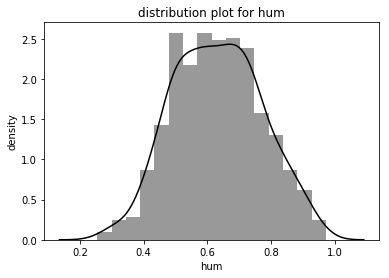

windspeed


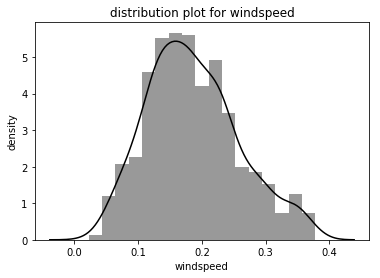

cnt


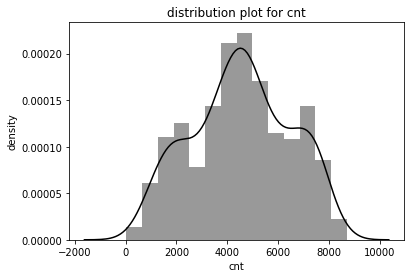

In [637]:
for i in col:
    print(i)
    sn.distplot(bike_rental_data[i],bins='auto',color='black')
    plt.title("distribution plot for "+i)
    plt.ylabel("density")
    plt.show()

based on distribution plot we can clearly see that all the numeric variables are normalized.

##### bivariate analysis

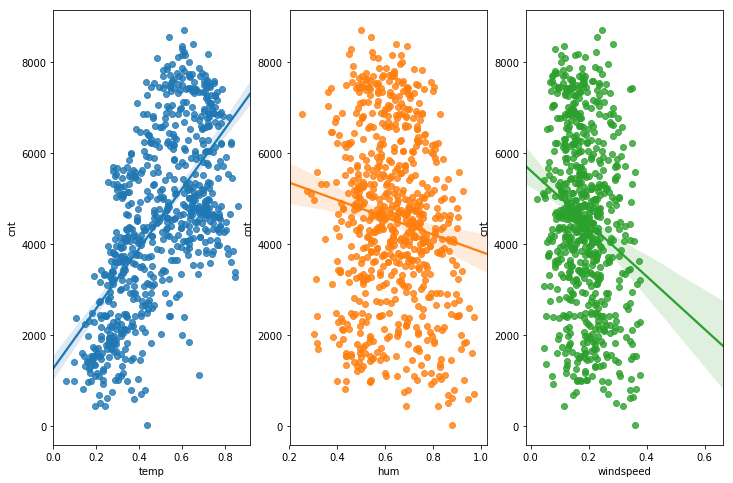

In [638]:
# Bivariate analysis of cnt and continous variables

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,8)

sn.regplot(x="temp",y="cnt",data=bike_rental_data,ax=ax1)
sn.regplot(x="hum",y="cnt",data=bike_rental_data,ax=ax2)
sn.regplot(x="windspeed",y="cnt",data=bike_rental_data,ax=ax3)

from above boxplot it is clear that bike count has:
(1) positive linear relationship with temperature.
(2) slightly negative linear relationship with humidity.
(3) negative linear reltionship with windspeed.

# model devlopment

In [639]:
#In Regression problems, we can't directly pass categorical variables.so we need to convert all categorical variables 
#into dummy variables.
ccol=['season','yr','mnth','weathersit']

#  Converting categorical variables to dummy variables
df = pd.get_dummies(bike_rental_data,columns=ccol)
bike_rental_data=df

In [640]:
#Divide the data into train and test set 

x= bike_rental_data.drop(['cnt'],axis=1)
y= bike_rental_data['cnt']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.25)

In [641]:
# Function for Error metrics to calculate the performance of model
def MAPE(y_true,y_prediction):
    mape= np.mean(np.abs(y_true-y_prediction)/y_true)*100
    return mape

### linear regression model

In [642]:
LinearRegression_model= sm.OLS(y_train,x_train).fit()
print(LinearRegression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     137.7
Date:                Mon, 13 Jan 2020   Prob (F-statistic):          4.89e-192
Time:                        02:59:43   Log-Likelihood:                -4323.7
No. Observations:                 537   AIC:                             8689.
Df Residuals:                     516   BIC:                             8779.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
temp          3957.4605    509.273      7.771   

In [643]:
# Model prediction on  train data
LinearRegression_train= LinearRegression_model.predict(x_train)

# Model prediction on test data
LinearRegression_test= LinearRegression_model.predict(x_test)

# Model performance on train data
MAPE_train= MAPE(y_train,LinearRegression_train)

# Model performance on test data
MAPE_test= MAPE(y_test,LinearRegression_test)

# r2 value for train data
r2_train= r2_score(y_train,LinearRegression_train)

# r2 value for test data-
r2_test=r2_score(y_test,LinearRegression_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,LinearRegression_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,LinearRegression_test))

print("Mean Absolute % Error for train data="+str(MAPE_train))
print("Mean Absolute % error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Mean Absolute % Error for train data=17.082502947078424
Mean Absolute % error for test data=118.12087757977703
R^2_score for train data=0.842162909044
R^2_score for test data=0.822670492262
RMSE for train data=759.491473876
RMSE for test data=838.843881302


In [644]:
Error_MetricsLT = {'Model Name': ['Linear Regression'],
                 'MAPE_Train':[MAPE_train],
                 'MAPE_Test':[MAPE_test],
                 'R-squared_Train':[r2_train],
                 'R-squared_Test':[r2_test],
                 'RMSE_train':[RMSE_train],
                 'RMSE_test':[RMSE_test]}

LinearRegression_Results = pd.DataFrame(Error_MetricsLT)

In [645]:
LinearRegression_Results

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train,RMSE_test,RMSE_train
0,118.120878,17.082503,Linear Regression,0.82267,0.842163,838.843881,759.491474


### random forest

In [646]:
# Random Forest for regression
RF_model= RandomForestRegressor(n_estimators=80).fit(x_train,y_train)

# Prediction on train data
RF_train= RF_model.predict(x_train)

# Prediction on test data
RF_test= RF_model.predict(x_test)

# MAPE For train data
MAPE_train= MAPE(y_train,RF_train)

# MAPE For test data
MAPE_test= MAPE(y_test,RF_test)

# Rsquare  For train data
r2_train= r2_score(y_train,RF_train)

# Rsquare  For test data
r2_test=r2_score(y_test,RF_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,RF_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,RF_test))

print("Mean Absolute % Error for train data="+str(MAPE_train))
print("Mean Absolute % Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Mean Absolute % Error for train data=6.437295947443336
Mean Absolute % Error for test data=126.14838373558284
R^2_score for train data=0.979979661594
R^2_score for test data=0.873407993169
RMSE for train data=270.491782519
RMSE for test data=708.751154195


In [647]:
Error_MetricsRF = {'Model Name': ['Random Forest'],
                 'MAPE_Train':[MAPE_train],
                 'MAPE_Test':[MAPE_test],
                 'R-squared_Train':[r2_train],
                 'R-squared_Test':[r2_test],
                 'RMSE_train':[RMSE_train],
                 'RMSE_test':[RMSE_test]}
                   
RandomForest_Results = pd.DataFrame(Error_MetricsRF)
RandomForest_Results

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train,RMSE_test,RMSE_train
0,126.148384,6.437296,Random Forest,0.873408,0.97998,708.751154,270.491783


### decision tree

In [648]:
# Decision tree for regression
DecisionTree_model= DecisionTreeRegressor(max_depth=3).fit(x_train,y_train)

# Model prediction on train data
DecisionTree_train= DecisionTree_model.predict(x_train)

# Model prediction on test data
DecisionTree_test= DecisionTree_model.predict(x_test)

# Model performance on train data
MAPE_train= MAPE(y_train,DecisionTree_train)

# Model performance on test data
MAPE_test= MAPE(y_test,DecisionTree_test)

# r2 value for train data
r2_train= r2_score(y_train,DecisionTree_train)

# r2 value for test data
r2_test=r2_score(y_test,DecisionTree_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,DecisionTree_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,DecisionTree_test))

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str(RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Mean Absolute Precentage Error for train data=22.48161096265372
Mean Absolute Precentage Error for test data=158.8834533406108
R^2_score for train data=0.798631792612
R^2_score for test data=0.758110526868
RMSE for train data=857.854869388
RMSE for test data=979.713564568


In [649]:
Error_MetricsDT = {'Model Name': ['Decision Tree'],
                 'MAPE_Train':[MAPE_train],
                 'MAPE_Test':[MAPE_test],
                 'R-squared_Train':[r2_train],
                 'R-squared_Test':[r2_test],
                 'RMSE_train':[RMSE_train],
                 'RMSE_test':[RMSE_test]}
                   
DecisionTree_Results = pd.DataFrame(Error_MetricsDT)
DecisionTree_Results 

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train,RMSE_test,RMSE_train
0,158.883453,22.481611,Decision Tree,0.758111,0.798632,979.713565,857.854869


From above results Random Forest & linear regression both model have optimum values and this algorithms are good for our data 

In [650]:
#saveing the out put of finalized model (random forest)

input = y_test.reset_index()
predicted = pd.DataFrame(RF_test,columns = ['predicted'])
Final_result = predicted.join(input)
Final_result

,predicted,index,cnt
0,7393.0000,635,7393
1,4307.4875,270,3907
2,6052.9750,493,5728
3,4770.0375,231,5191
4,4092.2625,413,4318
5,5132.8500,165,5180
6,1276.0875,8,822
7,2088.9875,63,2077
8,4034.2375,700,5191
9,6365.1500,476,6624


In [651]:
Final_result.to_csv("Final_results_python.csv",index=False)